In [4]:
# Import necessary packages
import pandas as pd
import numpy as np

# Visualization packages
import seaborn as sns
import matplotlib.pyplot as plt

# Data preparation packages
from sklearn.preprocessing import StandardScaler

# Clustering packages
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA



In [5]:
#import data
file_path = "https://raw.githubusercontent.com/MiliCod/Insights-Unveiled-A-Data-Driven-Exploration-of-Student-Stress-Factors/main/StressLevelDataset.csv"
df=pd.read_csv(file_path)
df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [6]:
parametre1='academic_performance'
parametre2="study_load"
parametre3='teacher_student_relationship'
parametre4='future_career_concerns'
dfa=df[[parametre1,parametre2,parametre3,parametre4]]
dfa



,academic_performance,study_load,teacher_student_relationship,future_career_concerns
0,3,2,3,3
1,1,4,1,5
2,2,3,3,2
3,2,4,1,4
4,4,3,1,2
...,...,...,...,...
1095,2,2,2,3
1096,0,1,1,1
1097,5,1,4,1
1098,2,5,1,4


In [7]:
#center and reduce our data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(dfa)
x_scaled

array([[ 0.16073598, -0.47279981,  0.25421325,  0.22955038],
       [-1.25374063,  1.04790134, -1.19092669,  1.53786859],
       [-0.54650233,  0.28755076,  0.25421325, -0.42460873],
       ...,
       [ 1.57521259, -1.23315039,  0.97678322, -1.07876784],
       [-0.54650233,  1.80825192, -1.19092669,  0.88370948],
       [ 0.16073598,  1.04790134,  0.25421325,  0.22955038]])

In [8]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
wcss

C:\Users\vivie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


[4400.000000000002,
 2153.951402664406,
 1406.038018602006,
 1216.058732034579,
 1100.8625491365492,
 1022.6310179613408,
 939.7618955106402,
 883.0345271850642,
 832.336504413287,
 803.1975960096108]

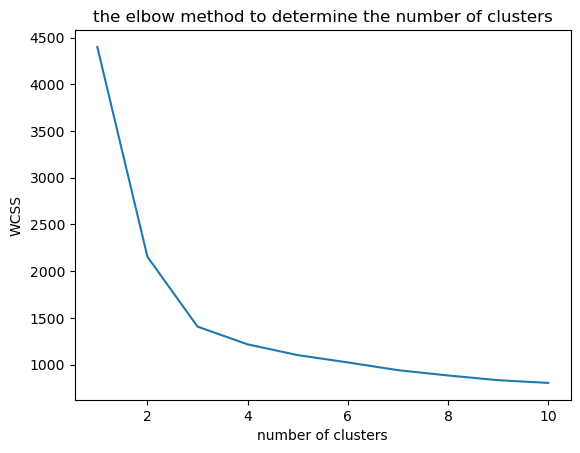

In [9]:
plt.plot(range(1, 11), wcss)
plt.title('the elbow method to determine the number of clusters')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
kmeans_etats = KMeans(n_clusters=3, init = 'k-means++')


In [11]:
kmeans_etats.fit(x_scaled)


KMeans(n_clusters=3)

In [12]:
clusters = kmeans_etats.predict(x_scaled)


In [13]:
dfa['cluster']=clusters
dfa

C:\Users\vivie\AppData\Local\Temp\ipykernel_12720\2827658313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['cluster']=clusters


,academic_performance,study_load,teacher_student_relationship,future_career_concerns,cluster
0,3,2,3,3,0
1,1,4,1,5,1
2,2,3,3,2,0
3,2,4,1,4,1
4,4,3,1,2,0
...,...,...,...,...,...
1095,2,2,2,3,0
1096,0,1,1,1,0
1097,5,1,4,1,2
1098,2,5,1,4,1


In [14]:
dfa_clusters = dfa.groupby(['cluster']).median().round(0)  
dfa_clusters

,academic_performance,study_load,teacher_student_relationship,future_career_concerns
cluster,,,,
0,2.0,2.0,2.0,2.0
1,2.0,4.0,1.0,4.0
2,5.0,1.0,4.0,1.0


In [15]:
for i in range(4):
    print(f'Cluster {i}')
    print(dfa[dfa.cluster == i].index.tolist())
    print()

Cluster 0
[0, 2, 4, 8, 13, 15, 18, 24, 27, 28, 33, 35, 36, 48, 51, 54, 55, 56, 63, 64, 67, 68, 78, 81, 84, 85, 86, 88, 90, 99, 100, 102, 103, 113, 114, 116, 119, 123, 124, 125, 126, 128, 129, 131, 132, 133, 134, 135, 139, 142, 144, 146, 148, 151, 152, 155, 157, 160, 161, 163, 166, 168, 169, 171, 172, 179, 182, 184, 186, 188, 191, 192, 193, 198, 199, 203, 204, 209, 210, 213, 216, 217, 219, 220, 221, 222, 225, 226, 227, 228, 229, 233, 237, 238, 240, 242, 243, 251, 252, 253, 255, 258, 259, 261, 263, 264, 265, 266, 270, 275, 278, 279, 284, 285, 286, 290, 293, 295, 297, 298, 301, 302, 307, 309, 311, 312, 313, 319, 320, 324, 325, 329, 330, 334, 336, 341, 350, 351, 352, 357, 360, 361, 362, 364, 373, 376, 379, 380, 383, 384, 386, 387, 390, 392, 393, 396, 404, 405, 409, 410, 411, 412, 413, 414, 416, 420, 422, 424, 427, 431, 435, 437, 438, 441, 444, 449, 452, 454, 455, 458, 459, 462, 463, 468, 471, 475, 478, 488, 489, 492, 494, 495, 496, 498, 506, 507, 511, 514, 515, 516, 519, 522, 524, 525, 528

In [16]:
# Assuming max_values contains the maximum values for each column in dfa
max_values = dfa[[parametre1, parametre2, parametre3,parametre4]].max()




# Assuming target_columns is the list ['parametre1', 'parametre2', 'parametre3', 'parametre4']
values = {}
for column in dfa_clusters:
    try:
        user_input = float(input(f'Give a score between 1 and 10 for your level of {column}: '))
        if 0 <= user_input <= 10:
            values[column] = user_input  # Store the valid input in the dictionary
        else:
            print("Value must be between 1 and 10. Please try again.")
    except ValueError:
        print("Invalid input. Please enter a numeric value.")

        
        
# Calculate scaled values
scaled_values = {}
for column in dfa_clusters:
    scaled_value = (values[column])
    scaled_values[column] = scaled_value

# Now 'scaled_values' dictionary contains the scaled values for each column
print(scaled_values)


Give a score between 1 and 10 for your level of academic_performance:  9
Give a score between 1 and 10 for your level of study_load:  3
Give a score between 1 and 10 for your level of teacher_student_relationship:  7
Give a score between 1 and 10 for your level of future_career_concerns:  2


{'academic_performance': 9.0, 'study_load': 3.0, 'teacher_student_relationship': 7.0, 'future_career_concerns': 2.0}


In [17]:
# Create a DataFrame with user values
user_df = pd.DataFrame([scaled_values]) / 10
#print(user_df)

# Normalize each criterion of reference clusters in the same way
dfa_clusters_normalized = dfa_clusters / max_values
#print(dfa_clusters_normalized)

# Calculate the Euclidean distance between normalized values and cluster centers
distances = np.linalg.norm(user_df.values - dfa_clusters_normalized.values[:, :4], axis=1)
#print(distances)

# Find the index of the closest cluster
closest_cluster_index = np.argmin(distances)
#print(closest_cluster_index)

# Retrieve the cluster number
predicted_cluster = dfa_clusters_normalized.index[closest_cluster_index]

print(f"The normalized user values are closest to Cluster {predicted_cluster}")

# Calculate reliability based on the inverse of the distance
reliability = 1 / (1 + distances[closest_cluster_index])

# Display reliability
print(f"Reliability of the result: {reliability * 100}%")


The normalized user values are closest to Cluster 2
Reliability of the result: 85.23658961269199%


In [18]:
text1 = """
+------------------------------------------------------------------+
| Your academic excellence does not seem to be the result of an    |
| unbearable study load. It may be beneficial to further explore   |
| career opportunities, gain advice, and establish long-term goals.|
| A balance between academic excellence and career planning can    |
| support a smoother transition into the professional world and    |
| help alleviate the pressures of future uncertainty, often        |
| associated with student stress.                                  |
|                                                                  |
| Bottom line: Your current academic performance and effective     |
| management of the study load do not appear to be a current       |
| source of stress. However, it is crucial to recognize that       |
| planning for your future career can be an important aspect of    |
| avoiding future concerns and stress. For this, you can turn to   |
| your teachers because you have good relationships with them,     |
| and seeking their advice will not represent an unnatural or      |
| discomforting gesture for you.                                   |
+------------------------------------------------------------------+
"""


In [19]:
text2 = """
+----------------------------------------------------------------+
| You demonstrate intense academic commitment and a strong       |
| interest in your future career. However, your academic         |
| performance does not meet your expectations, and tensions      |
| with your teachers reveal challenges. This situation can be a  |
| source of stress, stemming from the pressure to excel and      |
| relationship difficulties.                                     |
|                                                                |
| Bottom line: Your academic results and tensions with your      |
| teachers are potential factors of stress. Self-imposed academic|
| success can create significant pressure, combined with results |
| that you consider average. Difficult relationships also        |
| contribute to a stressful everyday atmosphere. Developing time |
| management skills can optimize academic work and reduce        |
| deadline stress. If having a conversation with a professor     |
| seems difficult, find family members or others with whom you   |
| can discuss work time management for the best results. Your    |
| academic commitment can be a source of stress because you      |
| worry about the situation, but the results do not meet your    |
| expectations. It is essential to find someone to share these   |
| concerns with.                                                 |
+----------------------------------------------------------------+
"""


In [20]:
text3 = """
+-----------------------------------------------------------------+
| You demonstrate average academic performance and rapport with   |
| your teachers, and although you have little investment in your  |
| professional future, your workload is also limited. This        |
| combination can influence your overall experience, as average   |
| results and limited investment in your professional future can  |
| be sources of future stress even if not today.                  |
|                                                                 |
| Conclusion: Your academic results and the relationship with     |
| your teachers can generate stress. The absence of significant   |
| commitment to your professional future and a limited workload   |
| accentuate these sources of stress. Explore your professional   |
| interests, get more involved, and set clear goals to alleviate  |
| this stress. Improving communication with your teachers can     |
| also promote a more positive school experience. By balancing    |
| educational investment and career planning, you can reduce the  |
| stress associated with these areas.                             |
+-----------------------------------------------------------------+
"""


In [21]:
# Retrieve the values of anxiety_level, self_esteem, and depression for the predicted cluster
predicted_values = dfa_clusters.loc[predicted_cluster, [parametre1, parametre2, parametre3, parametre4]]


if predicted_values[parametre1] == 5.0 and predicted_values[parametre2] == 1.0 and predicted_values[parametre3] == 4.0 and predicted_values[parametre4] == 1.0:
    print(text1)
    
if predicted_values[parametre1] == 2.0 and predicted_values[parametre2] == 4.0 and predicted_values[parametre3] == 1.0 and predicted_values[parametre4] == 4.0:
    print(text2)
    
if predicted_values[parametre1] == 2.0 and predicted_values[parametre2] == 2.0 and predicted_values[parametre3] == 2.0 and predicted_values[parametre4] == 2.0:
    print(text3)
    




+------------------------------------------------------------------+
| Your academic excellence does not seem to be the result of an    |
| unbearable study load. It may be beneficial to further explore   |
| career opportunities, gain advice, and establish long-term goals.|
| A balance between academic excellence and career planning can    |
| support a smoother transition into the professional world and    |
| help alleviate the pressures of future uncertainty, often        |
| associated with student stress.                                  |
|                                                                  |
| Bottom line: Your current academic performance and effective     |
| management of the study load do not appear to be a current       |
| source of stress. However, it is crucial to recognize that       |
| planning for your future career can be an important aspect of    |
| avoiding future concerns and stress. For this, you can turn to   |
| your teachers because you have 